# Vincent Eung & Hugo Grandjean


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('atp_matches.csv')
df.head()

tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  1968-2029       Dublin   Grass         32             A      19680708   
1  1968-2029       Dublin   Grass         32             A      19680708   
2  1968-2029       Dublin   Grass         32             A      19680708   
3  1968-2029       Dublin   Grass         32             A      19680708   
4  1968-2029       Dublin   Grass         32             A      19680708   

   match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        270     112411          NaN          NaN  ...     NaN      NaN   
1        271     126914          NaN          NaN  ...     NaN      NaN   
2        272     209523          NaN          NaN  ...     NaN      NaN   
3        273     100084          NaN          NaN  ...     NaN      NaN   
4        274     100132          NaN          NaN  ...     NaN      NaN   

   l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank winner_rank_points  \
0       NaN     NaN        NaN        NaN          NaN                NaN   
1       NaN     NaN        NaN        NaN          NaN                NaN   
2       NaN     NaN        NaN        NaN          NaN                NaN   
3       NaN     NaN        NaN        NaN          NaN                NaN   
4       NaN     NaN        NaN        NaN          NaN                NaN   

  loser_rank loser_rank_points  
0        NaN               NaN  
1        NaN               NaN  
2        NaN               NaN  
3        NaN               NaN  
4        NaN               NaN  

[5 rows x 49 columns]

# Data Preprocessing

In [119]:
#Suppression colonne(s)

df.drop(['winner_seed','winner_entry','draw_size', 'tourney_id', 'match_num', 'winner_id', 'winner_hand', 'winner_ioc', 'loser_hand', 'loser_ioc','best_of', 'l_SvGms'], axis = 1, inplace = True)


In [120]:
#Suppression lignes NAN et remplacé par "Autres"

df['l_1stIn'] = df['l_1stIn'].replace(np.nan,'Autres')
df['l_1stWon'] = df['l_1stWon'].replace(np.nan,'Autres')
df['l_2ndWon'] = df['l_2ndWon'].replace(np.nan,'Autres')

df['l_bpSaved'] = df['l_bpSaved'].replace(np.nan,'Autres')
df['l_bpFaced'] = df['l_bpFaced'].replace(np.nan,'Autres')
df['winner_rank'] = df['winner_rank'].replace(np.nan,'Autres')
df['winner_rank_points'] = df['winner_rank_points'].replace(np.nan,'Autres')
df['loser_rank'] = df['loser_rank'].replace(np.nan,'Autres')
df['loser_rank_points'] = df['loser_rank_points'].replace(np.nan,'Autres')



In [121]:
df = df.replace(np.nan, 'Autres')


In [122]:
df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')


In [123]:
# Convertir la colonne 'tourney_date' au format datetime si ce n'est pas déjà fait
df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')

# Filtrer les lignes pour ne conserver que les matchs depuis 2003
df = df[df['tourney_date'] >= pd.to_datetime('2003-01-01')]




In [124]:


# Remplacer les valeurs 'Autres' par NaN
df['w_bpSaved'] = df['w_bpSaved'].replace('Autres', pd.NA)

# Calculer la moyenne des valeurs numériques de la colonne 'w_bpSaved'
mean_w_bpSaved = df['w_bpSaved'].mean(skipna=True)

# Remplacer les NaN par la moyenne calculée
df['w_bpSaved'] = df['w_bpSaved'].fillna(mean_w_bpSaved)



In [125]:

# Remplacer les valeurs 'Autres' par NaN
df['w_bpFaced'] = df['w_bpFaced'].replace('Autres', pd.NA)

# Calculer la moyenne des valeurs numériques de la colonne 'w_bpSaved'
mean_w_bpSaved = df['w_bpFaced'].mean(skipna=True)

# Remplacer les NaN par la moyenne calculée
df['w_bpFaCed'] = df['w_bpFaced'].fillna(mean_w_bpSaved)




In [126]:
import pandas as pd


df = df.replace({'Autres': 0})


In [127]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df

# Liste des colonnes à supprimer
drop = ['loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_ht', 'loser_age',
                        'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_bpSaved', 'l_bpFaced',
                        'loser_rank', 'loser_rank_points', 'w_SvGms', 'w_svpt']

# Supprimer les colonnes du DataFrame
df = df.drop(columns=drop)


In [128]:
df = df[df['winner_name'].isin(['Rafael Nadal', 'Roger Federer', 'Novak Djokovic'])]

# Réinitialiser les index après la suppression des lignes
df = df.reset_index(drop=True)

In [129]:
df

tourney_name surface tourney_level tourney_date     winner_name  \
0     Madrid Masters    Hard             M   2003-10-13   Roger Federer   
1     Madrid Masters    Hard             M   2003-10-13   Roger Federer   
2     Madrid Masters    Hard             M   2003-10-13   Roger Federer   
3             Munich    Clay             A   2003-04-28   Roger Federer   
4             Munich    Clay             A   2003-04-28   Roger Federer   
...              ...     ...           ...          ...             ...   
3221     Tour Finals    Hard             F   2022-11-14  Novak Djokovic   
3222     Tour Finals    Hard             F   2022-11-14    Rafael Nadal   
3223     Tour Finals    Hard             F   2022-11-14  Novak Djokovic   
3224     Tour Finals    Hard             F   2022-11-14  Novak Djokovic   
3225     Tour Finals    Hard             F   2022-11-14  Novak Djokovic   

      winner_ht  winner_age              score round  minutes  w_ace  w_df  \
0         185.0        22.1            6-4 6-3   R32      0.0    0.0   0.0   
1         185.0        22.1         6-3 7-6(4)   R16      0.0    0.0   0.0   
2         185.0        22.1     4-6 7-6(3) 6-4    QF      0.0    0.0   0.0   
3         185.0        21.7            6-4 6-3   R32     65.0    6.0   6.0   
4         185.0        21.7            6-4 6-3   R16     59.0    1.0   1.0   
...         ...         ...                ...   ...      ...    ...   ...   
3221      188.0        35.4      7-6(5) 7-6(6)    SF    114.0    4.0   1.0   
3222      185.0        36.4            7-5 7-5    RR    102.0   16.0   1.0   
3223      188.0        35.4         6-4 7-6(4)    RR     98.0    3.0   2.0   
3224      188.0        35.4  6-3 6-7(5) 7-6(2)    RR    191.0    9.0   3.0   
3225      188.0        35.4            6-4 6-1    RR     67.0   12.0   0.0   

      w_1stIn  w_1stWon  w_2ndWon  w_bpSaved w_bpFaced  winner_rank  \
0         0.0       0.0       0.0   3.430332      <NA>          3.0   
1         0.0       0.0       0.0   3.430332      <NA>          3.0   
2         0.0       0.0       0.0   3.430332      <NA>          3.0   
3        36.0      25.0      14.0   3.000000       5.0          5.0   
4        31.0      22.0      14.0   0.000000       1.0          5.0   
...       ...       ...       ...        ...       ...          ...   
3221     53.0      40.0      14.0   0.000000       2.0          8.0   
3222     41.0      38.0      12.0   2.000000       2.0          2.0   
3223     44.0      36.0      14.0   1.000000       1.0          8.0   
3224     85.0      67.0      22.0   5.000000       6.0          8.0   
3225     35.0      33.0       3.0   0.000000       0.0          8.0   

      winner_rank_points  w_bpFaCed  
0                 3825.0   4.980749  
1                 3825.0   4.980749  
2                 3825.0   4.980749  
3                 2480.0   5.000000  
4                 2480.0   1.000000  
...                  ...        ...  
3221              3320.0   2.000000  
3222              5820.0   2.000000  
3223              3320.0   1.000000  
3224              3320.0   6.000000  
3225              3320.0   0.000000  

[3226 rows x 20 columns]

In [130]:
import pandas as pd

# Assuming you already have a DataFrame named 'df' with your data

# Specify the name of the CSV file you want to create
atp_matches = "output_file.csv"

# Save the DataFrame to a CSV file
df.to_csv(atp_matches, index=False)

print(f"The DataFrame has been successfully saved to {atp_matches}.")

The DataFrame has been successfully saved to output_file.csv.


# 1. Analyse the variables, by computing the correlations in order to detect the most important and explain your analysis.

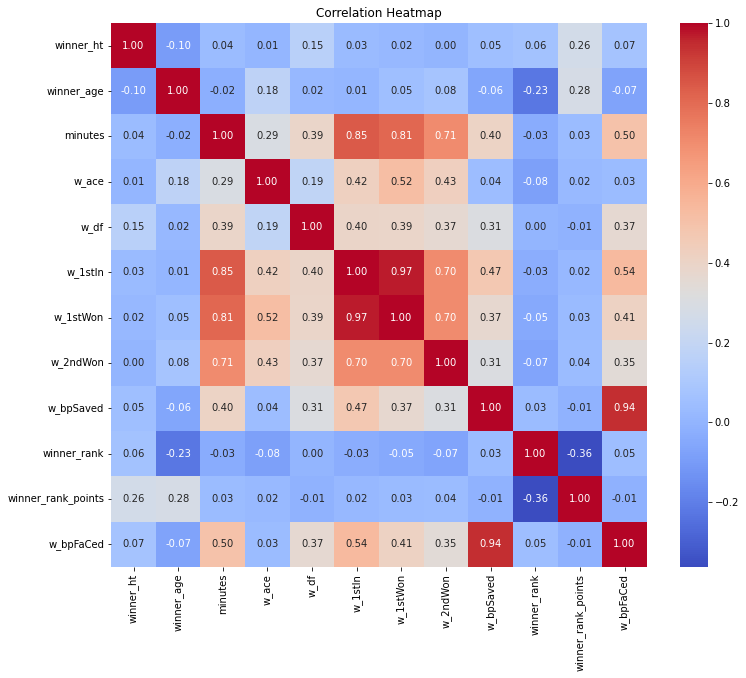

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlations
correlations = df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Résultats
- **Correlation Coefficient** : 
The correlation coefficient is a statistical measure that quantifies the strength and direction of a linear relationship between two variables. It ranges from -1 to 1, where:
1 indicates a perfect positive linear relationship, 0 indicates no linear relationship, and -1 indicates a perfect negative linear relationship.

- **Interpretation** : 
A positive correlation coefficient indicates that as one variable increases, the other variable tends to increase as well. A negative correlation coefficient indicates that as one variable increases, the other variable tends to decrease.

- **Focus on the service** : 
According to the data visualisation that we made in part 1, we decided to focus our part 2 on the service to see and understand the different relation, 

### Analysis : The service, essential phase of tennis

- **line w_1stIn (average % on first service)** : According to the matrix, the relation between the average % of first service and the number of minutes played in a match,the % of points won after 1st service and after second service are very strong (>0.70). Of course when the average of first service is high, it means the probability of made aces is higher, so the time between points can be lower. Moreover, the average % of first service and the number of break points saved have a positive correlation coefficient (=0.54). When a player are under pressure, his service can be a powerful weapon.Conversely, the service is not linked to the player's rank. Even with a very good serve, a player can concede break points and have an average tactical game. For example, Nadal, Djokovic and Federer are not the best service player but they managed to counter their opponents through tactical play (forehands, backhands, dropshots).


# 2. Apply different manifold learning (projections) approaches on the dataset by visualising the results in 2D or 3D. If possible, compute the errors. 

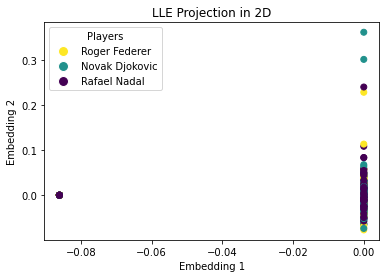

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler

selected_columns = ['winner_name', 'minutes', 'w_ace', 'w_df', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved', 'w_bpFaCed']


selected_players = ['Rafael Nadal', 'Novak Djokovic', 'Roger Federer']
filtered_data = df[df['winner_name'].isin(selected_players)][selected_columns]


filtered_data['winner_name'] = filtered_data['winner_name'].astype('category').cat.codes

X = filtered_data.drop('winner_name', axis=1)
X_scaled = StandardScaler().fit_transform(X)


lle = LocallyLinearEmbedding(n_components=2)
lle_result = lle.fit_transform(X_scaled)


scatter = plt.scatter(lle_result[:, 0], lle_result[:, 1], c=filtered_data['winner_name'], cmap='viridis')
plt.title('LLE Projection in 2D')
plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(c)),
            markersize=10, label=f'{selected_players[int(c)]}') for c in filtered_data['winner_name'].unique()]
plt.legend(handles=handles, title='Players')

plt.show()


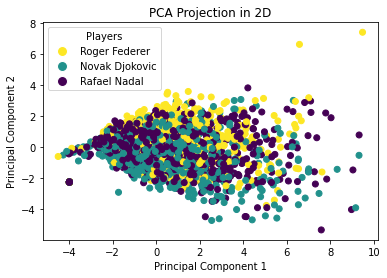

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

selected_columns = ['winner_name', 'minutes', 'w_ace', 'w_df', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved', 'w_bpFaCed']

selected_players = ['Rafael Nadal', 'Novak Djokovic', 'Roger Federer']
filtered_data = df[df['winner_name'].isin(selected_players)][selected_columns]

filtered_data['winner_name'] = filtered_data['winner_name'].astype('category').cat.codes


X = filtered_data.drop('winner_name', axis=1)
X_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=filtered_data['winner_name'], cmap='viridis')
plt.title('PCA Projection in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(c)),
            markersize=10, label=f'{selected_players[int(c)]}') for c in filtered_data['winner_name'].unique()]
plt.legend(handles=handles, title='Players')

plt.show()


With PCA and LLE analysis, we can conclude that the service between Rafael Nadal, Roger Federer and Novak Djokovic is very similar.It means that during all their career, the average in term of ace, 1st and 2nd serve winning percent, double fault was approximately equal.

# 3. Apply an external validation process (classification and/or regression) to choose the best method. 

In [134]:

import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

selected_columns = ['winner_name', 'minutes', 'w_ace', 'w_df', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved', 'w_bpFaCed']
data_subset = df[selected_columns]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset.drop(['winner_name', 'w_ace'], axis=1))

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)


result_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
result_df['w_ace'] = data_subset['w_ace']

target_variable = data_subset['w_ace']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target_variable, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the regression performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Absolute Error: 2.517135344157901
Mean Squared Error: 10.671885247504962
R-squared: 0.41575682000589276


In [135]:

import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

selected_columns = ['winner_name', 'minutes', 'w_ace', 'w_df', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_bpSaved', 'w_bpFaCed']
data_subset = df[selected_columns]

threshold = 10
data_subset['w_ace_class'] = data_subset['w_ace'].apply(lambda x: 1 if x >= threshold else 0)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset.drop(['winner_name', 'w_ace', 'w_ace_class'], axis=1))

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)


result_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
result_df['w_ace_class'] = data_subset['w_ace_class']


target_variable = data_subset['w_ace_class']


X_train, X_test, y_train, y_test = train_test_split(data_scaled, target_variable, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


C:\Users\hugo0\AppData\Local\Temp\ipykernel_29480\2534701929.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['w_ace_class'] = data_subset['w_ace'].apply(lambda x: 1 if x >= threshold else 0)


              precision    recall  f1-score   support

           0       0.87      0.97      0.92       539
           1       0.64      0.25      0.36       107

    accuracy                           0.85       646
   macro avg       0.76      0.61      0.64       646
weighted avg       0.83      0.85      0.83       646

[[524  15]
 [ 80  27]]


# 4. Explain the model and why it works best for this problem/dataset. 

### Analysis : explain the model of question 3

In this analysis, we set the threshold at 10. It means that if the number of aces for a given match is greater than or equal to 10, this match belongs to the "high number of aces" class. 'aces' (1), otherwise it belongs to the class 'low number of aces' (0).


1. **Precision:**
   - Precision is the ratio of correctly predicted positive observations to the total predicted positives.
   - For class 0 (low number of aces), precision is 0.87, meaning that 87% of the instances predicted as class 0 were actually class 0.
   - For class 1 (high number of aces), precision is 0.64, indicating that 64% of the instances predicted as class 1 were actually class 1.


2. **Recall:**
   - Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
   - For class 0, recall is 0.97, meaning that 97% of the instances that are actually class 0 were correctly predicted as class 0.
   - For class 1, recall is 0.25, indicating that only 25% of the instances that are actually class 1 were correctly predicted as class 1.


3. **F1-Score:**
   - F1-Score is the weighted average of Precision and Recall. It ranges from 0 to 1, where 1 is the best possible F1-Score.
   - For class 0, the F1-Score is 0.92.
   - For class 1, the F1-Score is 0.36.


4. **Support:**
   - Support is the number of actual occurrences of the class in the specified dataset.
   - For class 0, there are 539 instances in the testing set.
   - For class 1, there are 107 instances in the testing set.


5. **Accuracy:**
   - Accuracy is the ratio of correctly predicted observations to the total observations.
   - The overall accuracy is 85%, meaning that 85% of the instances in the testing set were correctly classified.

From these metrics, you can see that the model performs well for class 0 (low number of aces) with high precision, recall, and F1-score. However, for class 1 (high number of aces), the performance is lower, especially in terms of recall, indicating that the model struggles to correctly identify instances of high numbers of aces.

### Analysis : why it works for tennis dataset

The suitability of the Random Forest model for a tennis dataset, especially when predicting the number of aces might work well for this problem:

A. **Non-Linear Relationships:**
   - Tennis match statistics often involve non-linear relationships. The number of aces, for example, may not follow a simple linear pattern with other features.
   
B. **Handling Interactions Between Features:**
   - Tennis match outcomes are influenced by several factors such as serving efficiency (% of first and second servie), match duration, and break points faced/saved. So, Random Forests by constructing multiple decision trees, can effectively capture interactions between these features, contributing to a more accurate prediction of the number of aces.

D. **Feature Importance Analysis:**
   - The Random Forest model provides a measure of feature importance. In the context of tennis, analyse aces can be done in several ways. For example, we analyze which aspects of a player's performance, playing different surface or match level (Grand Slam, ATP matches, Masters 1000) have a crucial impact on their ace count.


E. **Efficient and:**
   - Random Forests are easy to implement, and they come with a set of parameters that can be changed for better performance. 



# 5. Analyse how the projection results can be improved and propose some solutions related to the dataset you analyse.

To improve the projection results, we have several options :

1. **New features**
   - Explore the possibility of creating new features that might capture relevant information. For example, compare the statistics of Nadal, Djokovic and Federer with historical players like Agassi, Borg, Sampras...(only problem is to have a robust dataset). Then, we could make comparison with the new generation (Alcaraz, Sinner...) to know if there are similarities at the start of their career.Finally, we could analyze winning forehands and backhands, net points won...


2. **New Techniques and cross validation:**
   - We can explore alternative dimensionality reduction techniques like UMAP (Uniform Manifold Approximation and Projection), or Isomap. Moreover, we can perform cross-validation to ensure the stability and robustness of the projection results. 


3. **Data Visualisation:**
   - Experiment with others advanced visualization techniques like parallel coordinates or heatmaps to have an even more precise understanding of the physical abilities of the players .


4. **Ensemble Approaches:**
   - We could have combined multiple projections or manifold learning algorithms into an ensemble might enhance the overall representation of the dataset.


